## FRONT-END SCRAPPING



In [ ]:
!pip install httpx

In [ ]:
import httpx
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
#dataframe manually created from information on internet. 
results = pd.read_excel('rsults.xlsx')
results

,politc_party,ideology,taler,2019_votes,2022_votes,colour
0,Social Democrats,Social Democracy,Mette Frederiksen,0.259,0.2750,Red
1,Venstre,Conservative liberalism,Jakob Ellemann-Jensen,0.234,0.1332,Blue
2,Danish People's Party,Danish nationalism,Morten Messerschmidt,0.087,0.0264,Blue
3,Danish Social Liberal Party,Social liberalism,Sofie Carsten Nielsen,0.086,0.0379,Red
4,Green Left,Green politics,Pia Olsen Dyhr,0.077,0.0830,Red
5,Red–Green Alliance,Eco-socialism,Collective leadership,0.069,0.0513,Red
6,Conservative People's Party,Green conservatism,Søren Pape Poulsen,0.066,0.0551,Blue
7,The Alternative,Green politics,Franciska Rosenkilde,0.030,0.0333,Red
8,The New Right,National conservatism,Pernille Vermund,0.024,0.0367,Blue
9,Liberal Alliance,Right-libertarianism,Alex Vanopslagh,0.023,0.0789,Blue


In [ ]:
#results of the parties, contrast
results.groupby(['colour']).sum()

,2019_votes,2022_votes
colour,,
Blue,0.434,0.5042
Red,0.521,0.4805


[Text(0, 0, 'Social Democrats'),
 Text(1, 0, 'Venstre'),
 Text(2, 0, "Danish People's Party"),
 Text(3, 0, 'Danish Social Liberal Party'),
 Text(4, 0, 'Green Left'),
 Text(5, 0, 'Red–Green Alliance'),
 Text(6, 0, "Conservative People's Party"),
 Text(7, 0, 'The Alternative'),
 Text(8, 0, 'The New Right'),
 Text(9, 0, 'Liberal Alliance'),
 Text(10, 0, 'Moderates'),
 Text(11, 0, 'Denmark Democrats')]

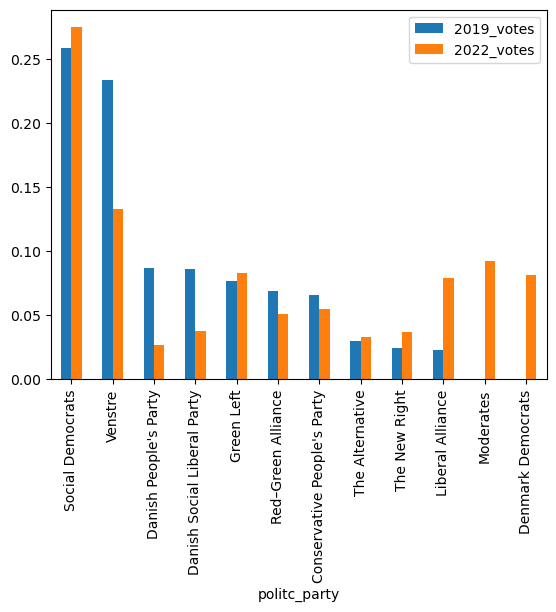

In [ ]:
#chart with the differences of the results in the elections 2022 in contrast by the ones on 2019
chart = results.plot(x="politc_party", y=["2019_votes",'2022_votes'], kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [ ]:
#web scrapping of the html code of the main page where all the talers appear
r = httpx.get('https://dansketaler.dk/temarum/valgkamp-2022/')
soup = BeautifulSoup(r.content)

In [ ]:
#find one div class where the link to the main page of a taler appears, display the first taler object
div = soup.find_all('div', attrs={'class':'col-12 col-mdph-6 col-mdtab-4 col-smdesk-3 featured-speeches-blocks__col'})
print('number of objects in div: ', len(div))
div[0]

number of objects in div:  44


<div class="col-12 col-mdph-6 col-mdtab-4 col-smdesk-3 featured-speeches-blocks__col">
<speech-regular-block :id="'featured_speeches_blocks-3__featured-speech-1'" :key="'featured_speeches_blocks-3__featured-speech-1'" display_type="regular-block" publish_date="4 november, 2022" tale_anledning="" tale_date="31/10/2022" tale_excerpt="Tale til FH&amp;nbsp; Jeg vil gerne citere tre lærlinge:&amp;nbsp; Daniel Gordon&amp;nbsp;”På mit SKP-center havde automatikteknikerne uden læreplads på et tidspunkt en periode på 3 måneder uden en lærer”&amp;nbsp;– Jimmi Elley&amp;nbsp;”Jeg bliver uddannet på de samme maskiner som min far gjorde” Mathias&amp;nbsp;Vinholt &amp;nbsp;”Lodde kurssuset blev sparet væk, men til gengæld lærte vi at reparere fastnettelefoner, og dem er der stadig tonsvis af i omløb.” Det er blot&amp;nbsp;tre&amp;nbsp;ud af hundrede historier, som lærlingeoprøret har fået frem.&amp;nbsp; Men når&amp;nbsp;man hører.&amp;nbsp; Politikere&amp;nbsp;en lige linje fra at sidde og rode med

In [ ]:
#select the link that drives to the main page of the later
div[0].select('speech-regular-block')[0]['taler_permalink']

'https://dansketaler.dk/taler/lind/'

In [ ]:
#function that extracts all the links to the main pages of the talers
permalinks = [x.select('speech-regular-block')[0]['taler_permalink'] for x in div]
permalinks[:10]

['https://dansketaler.dk/taler/lind/',
 'https://dansketaler.dk/taler/villadsen-mai/',
 'https://dansketaler.dk/taler/nielsen-sofie-carsten/',
 'https://dansketaler.dk/taler/svare-silke-ena/',
 'https://dansketaler.dk/taler/jensen-carsten/',
 'https://dansketaler.dk/taler/koefoed-simon-emil/',
 'https://dansketaler.dk/taler/frederiksen-mette/',
 'https://dansketaler.dk/taler/skaale-sjurdur/',
 'https://dansketaler.dk/taler/joensen-edmund/',
 'https://dansketaler.dk/taler/chemnitz-larsen-aaja/']

In [ ]:
print('There are ', len(permalinks), ' talers')

There are  44  talers


In [ ]:
#As an example, we are taking one permalink so as to extract all the speeches.
r_taler = httpx.get('https://dansketaler.dk/taler/villadsen-mai/')
soup_taler = BeautifulSoup(r_taler.content)

In [ ]:
#we access to the div class where the hyperlinks to the speeches are
speeches = soup_taler.find_all('div', attrs={'class':'single-taler__single-speech'})
print('number of speeches: ', len(speeches))
speeches[0]

number of speeches:  36


<div class="single-taler__single-speech">
<p>
<a href="https://dansketaler.dk/tale/mai-villadsens-tale-paa-valgnatten-2022/" title="">
							Mai Villadsens tale på valgnatten 2022						</a>
</p>
</div>

In [ ]:
#We extract the first link to a speech
speeches[0].select('a')[0]['href']

'https://dansketaler.dk/tale/mai-villadsens-tale-paa-valgnatten-2022/'

In [ ]:
#Finally, for one taler, all the links are extracted
speech_link = [x.select('a')[0]['href'] for x in speeches]
speech_link[:10]

['https://dansketaler.dk/tale/mai-villadsens-tale-paa-valgnatten-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-tale-ved-folketingets-aabningsdebat-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-tale-ved-ungdommens-folkemoede-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-tale-ved-enhedslistens-sommergruppemoede-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-folkemoedetale-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-aarsmoedetale-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-1-maj-tale-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-tale-ved-udvidet-partilederdebat-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-demonstrationstale-om-ruslands-invasion-af-ukraine-2022/',
 'https://dansketaler.dk/tale/mai-villadsens-tale-paa-kommunalvalgsaftenen-2021/']

In [ ]:
#This loop inside a loop, goes for all the talers and extracts the links to all the speeches
total_speeches = []
with httpx.Client() as client:
    for x in permalinks:
        case = client.get(x, timeout=20)
        speeches = BeautifulSoup(case.content).find_all('div', attrs={'class':'single-taler__single-speech'})
        count = 0
        
        for y in speeches[:50]:
            link = speeches[count].select('a')[0]['href']
            count += 1
            total_speeches.append(link)

In [ ]:
print('number of speeches', len(total_speeches))

number of speeches 1198


In [ ]:
#remove duplicates
speeches_link = [*set(total_speeches) ]
print('number of speeches', len(speeches_link))

number of speeches 287


In [ ]:
#For a given link fo an speech, this extracts the name of the taler as well as the politic party
def lecturer_information(link):

    with httpx.Client() as client:
        r = client.get(link, timeout=30.0)
    text = BeautifulSoup(r.content).find_all('div', attrs={'class':'single-tale__single-info single-tale__single-info__taler-navn'})
    taler = text[0].select('p')[1].select('a')[0]['title'][1:]
    try:
       politic_party = BeautifulSoup(str(text[0].select('p')[1].select('span')[0])).text
    except IndexError:
        politic_party = 'null'

    return [link, taler, politic_party]

In [ ]:
#Putting into a list all the links associated to the name of the taler and the link itself with the politic party
list_names = []

for x in speeches_link:
    list_names.append(lecturer_information(x))

In [ ]:
list_names[:5]

[['https://dansketaler.dk/tale/mette-frederiksens-partiledertale-ved-folkemoedet-2021/',
  'Mette Frederiksen',
  'Statsminister'],
 ['https://dansketaler.dk/tale/franciska-rosenkildes-folkemoedetale-2022/',
  'Franciska Rosenkilde',
  'Politiske leder for Alternativet '],
 ['https://dansketaler.dk/tale/alex-vanopslaghs-folkemoedetale-2022/',
  'Alex Vanopslagh',
  'Politisk leder for Liberal Alliance '],
 ['https://dansketaler.dk/tale/lars-boje-mathiesens-tale-ved-folketingets-aabningsdebat-2022/',
  'Lars Boje Mathiesen',
  'Ordfører i Nye Borgerlige '],
 ['https://dansketaler.dk/tale/statsminister-lars-loekke-rasmussens-tale-ved-folketingets-aabning-2015/',
  'Lars Løkke Rasmussen',
  'Statsminister ']]

In [ ]:
#splitting the list into a dataframe
data = pd.DataFrame.from_dict(list_names)
data.rename(columns={0: "link", 1: "taler", 2: "politic_party"}, inplace = True)
data.head()

,link,taler,politic_party
0,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister
1,https://dansketaler.dk/tale/franciska-rosenkil...,Franciska Rosenkilde,Politiske leder for Alternativet
2,https://dansketaler.dk/tale/alex-vanopslaghs-f...,Alex Vanopslagh,Politisk leder for Liberal Alliance
3,https://dansketaler.dk/tale/lars-boje-mathiese...,Lars Boje Mathiesen,Ordfører i Nye Borgerlige
4,https://dansketaler.dk/tale/statsminister-lars...,Lars Løkke Rasmussen,Statsminister


In [ ]:
data.shape

(287, 3)

In [ ]:
#number of the speeches per taler collected
data.taler.value_counts()

Mette Frederiksen             50
Lars Løkke Rasmussen          50
Pia Olsen Dyhr                27
Søren Pape Poulsen            20
Mai Villadsen                 18
Jakob Ellemann-Jensen         18
Sofie Carsten Nielsen         15
Morten Messerschmidt          14
Bertel Haarder                13
Alex Vanopslagh               13
Pernille Vermund              11
Carsten Jensen                 6
Peter Skaarup                  6
Franciska Rosenkilde           5
Lars Boje Mathiesen            4
Mette Thiesen                  3
Torsten Gejl                   2
Edmund Joensen                 2
Aki-Matilda Høegh-Dam          2
Aaja Chemnitz Larsen           2
Sjúrður Skaale                 2
Simon Emil Koefoed             1
Silke Ena Svare                1
Carl Emil Lind Christensen     1
Lisbeth Bech-Nielsen           1
Name: taler, dtype: int64

In [ ]:
#data backup
total_data = data.copy() #backup
id(total_data)

2529644095616

In [ ]:
!pip install newspaper3k

In [ ]:
#The library article extracts text from a given url
from newspaper import Article
from newspaper import Config

In [ ]:
#class to extract the text from a given link
config = Config()
config.request_timeout = 30
def get_speech(url):
    article = Article(url, config=config)
    article.download()
    article.parse()
    return article.text

In [ ]:
# create a column with the speech
data['speech'] = data.apply(lambda x: get_speech(x['link']), axis=1)

In [ ]:
data.head()

,link,taler,politic_party,speech
0,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Tak til Alberte for den smukke sang. Du og din...
1,https://dansketaler.dk/tale/franciska-rosenkil...,Franciska Rosenkilde,Politiske leder for Alternativet,Kære alle sammen\n\nJeg hedder Franciska. Jeg ...
2,https://dansketaler.dk/tale/alex-vanopslaghs-f...,Alex Vanopslagh,Politisk leder for Liberal Alliance,"(Tak for introduktionen, Niels. Til de af jer,..."
3,https://dansketaler.dk/tale/lars-boje-mathiese...,Lars Boje Mathiesen,Ordfører i Nye Borgerlige,"Jeg skulle lige se, hvordan det er at sidde he..."
4,https://dansketaler.dk/tale/statsminister-lars...,Lars Løkke Rasmussen,Statsminister,Danmark er et dejligt land. Et af de bedste i ...


In [ ]:
# data.to_excel('speeches.xlsx')

In [ ]:
# data = pd.read_excel('speeches.xlsx')

In [ ]:
#collect all the laters from the DF results, where the target information appears
taler_unique = results.taler.unique()
taler_unique

array(['Mette Frederiksen', 'Jakob Ellemann-Jensen',
       'Morten Messerschmidt', 'Sofie Carsten Nielsen', 'Pia Olsen Dyhr',
       'Collective leadership', 'Søren Pape Poulsen',
       'Franciska Rosenkilde', 'Pernille Vermund', 'Alex Vanopslagh',
       'Lars Løkke Rasmussen', 'Inger Støjberg'], dtype=object)

In [ ]:
#Collect all the talers from the webscrapping
data.taler.unique()

array(['Mette Frederiksen', 'Franciska Rosenkilde', 'Alex Vanopslagh',
       'Lars Boje Mathiesen', 'Lars Løkke Rasmussen',
       'Jakob Ellemann-Jensen', 'Sofie Carsten Nielsen', 'Mai Villadsen',
       'Bertel Haarder', 'Torsten Gejl', 'Pia Olsen Dyhr',
       'Søren Pape Poulsen', 'Morten Messerschmidt', 'Carsten Jensen',
       'Pernille Vermund', 'Mette Thiesen', 'Silke Ena Svare',
       'Edmund Joensen', 'Aki-Matilda Høegh-Dam',
       'Carl Emil Lind Christensen', 'Peter Skaarup', 'Sjúrður Skaale',
       'Simon Emil Koefoed', 'Aaja Chemnitz Larsen',
       'Lisbeth Bech-Nielsen'], dtype=object)

In [ ]:
#Only take the speeches for the talers that appear in DF results
data = data.loc[data.apply(lambda x: x.taler in taler_unique, axis=1)].reset_index()
data_backup = data.copy()
data.head()

,index,link,taler,politic_party,speech
0,0,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Tak til Alberte for den smukke sang. Du og din...
1,1,https://dansketaler.dk/tale/franciska-rosenkil...,Franciska Rosenkilde,Politiske leder for Alternativet,Kære alle sammen\n\nJeg hedder Franciska. Jeg ...
2,2,https://dansketaler.dk/tale/alex-vanopslaghs-f...,Alex Vanopslagh,Politisk leder for Liberal Alliance,"(Tak for introduktionen, Niels. Til de af jer,..."
3,4,https://dansketaler.dk/tale/statsminister-lars...,Lars Løkke Rasmussen,Statsminister,Danmark er et dejligt land. Et af de bedste i ...
4,5,https://dansketaler.dk/tale/jakob-ellemann-jen...,Jakob Ellemann-Jensen,Folketingsmedlem for Venstre,Hvor er det dejligt at være her i Vejle til Ve...


In [ ]:
# data = data_backup

In [ ]:
data.head()

,index,link,taler,politic_party,speech
0,0,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Tak til Alberte for den smukke sang. Du og din...
1,1,https://dansketaler.dk/tale/franciska-rosenkil...,Franciska Rosenkilde,Politiske leder for Alternativet,Kære alle sammen\n\nJeg hedder Franciska. Jeg ...
2,2,https://dansketaler.dk/tale/alex-vanopslaghs-f...,Alex Vanopslagh,Politisk leder for Liberal Alliance,"(Tak for introduktionen, Niels. Til de af jer,..."
3,4,https://dansketaler.dk/tale/statsminister-lars...,Lars Løkke Rasmussen,Statsminister,Danmark er et dejligt land. Et af de bedste i ...
4,5,https://dansketaler.dk/tale/jakob-ellemann-jen...,Jakob Ellemann-Jensen,Folketingsmedlem for Venstre,Hvor er det dejligt at være her i Vejle til Ve...


In [ ]:
#Merge both Dataframes, so now we also have the target (colour)
data = pd.merge(data, results, on="taler")
data.head()


,index,link,taler,politic_party,speech,politc_party,ideology,2019_votes,2022_votes,colour
0,0,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Tak til Alberte for den smukke sang. Du og din...,Social Democrats,Social Democracy,0.259,0.275,Red
1,6,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Social Democrats,Social Democracy,0.259,0.275,Red
2,8,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,"Hjertelig velkommen. Og tak, fordi I har rydde...",Social Democrats,Social Democracy,0.259,0.275,Red
3,19,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Danmark er et fantastisk land. Men tiderne er ...,Social Democrats,Social Democracy,0.259,0.275,Red
4,21,https://dansketaler.dk/tale/mette-frederiksens...,Mette Frederiksen,Statsminister,Kære danskere. Kære ukrainere.\n\nI aften for ...,Social Democrats,Social Democracy,0.259,0.275,Red


In [ ]:
# Only take the relevant columns
data_new_backup = data.copy()
data = data[['politc_party', 'taler', 'speech', 'colour']]
data.head()

,politc_party,taler,speech,colour
0,Social Democrats,Mette Frederiksen,Tak til Alberte for den smukke sang. Du og din...,Red
1,Social Democrats,Mette Frederiksen,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Red
2,Social Democrats,Mette Frederiksen,"Hjertelig velkommen. Og tak, fordi I har rydde...",Red
3,Social Democrats,Mette Frederiksen,Danmark er et fantastisk land. Men tiderne er ...,Red
4,Social Democrats,Mette Frederiksen,Kære danskere. Kære ukrainere.\n\nI aften for ...,Red


In [ ]:
#Now, all the speeches are put into a columns separated per sentences. Instead of having the entire speech, we do also have the sentences
data_split = data["speech"].str.split('.', expand=True)
data = pd.concat([data, data_split], axis=1) #join sentences with original dataframe
data.head()

,politc_party,taler,speech,colour,0,1,2,3,4,5,...,685,686,687,688,689,690,691,692,693,694
0,Social Democrats,Mette Frederiksen,Tak til Alberte for den smukke sang. Du og din...,Red,Tak til Alberte for den smukke sang,Du og dine sange hjalp os igennem krisen,"Nu minder du os om den verden, der igen vælte...",Bøgen er sprunget ud,Fuglene er kommet igen,De lyse nætter er over os,...,None,None,None,None,None,None,None,None,None,None
1,Social Democrats,Mette Frederiksen,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Red,Deres Majestæt,\n\nDeres Kongelige Højheder,\n\nFolketingets formand,\n\nÆrede medlemmer af Folketinget,"\n\nAlle jer, der ser med",\n\nJeg vil gerne fortælle en historie om tre ...,...,None,None,None,None,None,None,None,None,None,None
2,Social Democrats,Mette Frederiksen,"Hjertelig velkommen. Og tak, fordi I har rydde...",Red,Hjertelig velkommen,"Og tak, fordi I har ryddet kalenderen en hel ...",\n\n\n\nFor halvandet års tid siden,I de mørkeste uger,"Var jeg ikke sikker på, at vi i august 2021 v...","\n\n\n\nVi sagde, at god og konsekvent epidemi...",...,None,None,None,None,None,None,None,None,None,None
3,Social Democrats,Mette Frederiksen,Danmark er et fantastisk land. Men tiderne er ...,Red,Danmark er et fantastisk land,Men tiderne er svære,Der er krig i Europa og økonomisk usikkerhed,"Priserne stiger på alt dét, vi har brug for –...","Den utryghed, det er den vigtigste politiske ...","Vi ved, det kan lade sig gøre, for ligesom vi...",...,None,None,None,None,None,None,None,None,None,None
4,Social Democrats,Mette Frederiksen,Kære danskere. Kære ukrainere.\n\nI aften for ...,Red,Kære danskere,Kære ukrainere,"\n\nI aften for 77 år siden kom den nyhed, som...",Danmark var atter frit,\n\nForestil jer Rådhuspladsen,"Lige her, hvor vi er nu",...,None,None,None,None,None,None,None,None,None,None


In [ ]:
#Columns are melted, so they are put into a row instead
data_melt = data.melt(id_vars=['taler', 'politc_party', 'speech', 'colour'], value_name="sentences")
data = data_melt
data_backup = data.copy()
data.head()

,taler,politc_party,speech,colour,variable,sentences
0,Mette Frederiksen,Social Democrats,Tak til Alberte for den smukke sang. Du og din...,Red,0,Tak til Alberte for den smukke sang
1,Mette Frederiksen,Social Democrats,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Red,0,Deres Majestæt
2,Mette Frederiksen,Social Democrats,"Hjertelig velkommen. Og tak, fordi I har rydde...",Red,0,Hjertelig velkommen
3,Mette Frederiksen,Social Democrats,Danmark er et fantastisk land. Men tiderne er ...,Red,0,Danmark er et fantastisk land
4,Mette Frederiksen,Social Democrats,Kære danskere. Kære ukrainere.\n\nI aften for ...,Red,0,Kære danskere


In [ ]:
#the number of rows is equal to the number of sentences
data.shape

(154985, 6)

In [ ]:
print('number of NaN cells: ', data['sentences'].isna().sum())
print('number of empty cells: ', len(data[data['sentences']=='']))

number of NaN cells:  116432
number of empty cells:  163


In [ ]:
#Removing null and NaN rows
data.dropna(inplace=True)
data = data[data['sentences'] != '']
print('new shape is', data.shape)


new shape is (38390, 6)


In [ ]:
data.head()

,taler,politc_party,speech,colour,variable,sentences
0,Mette Frederiksen,Social Democrats,Tak til Alberte for den smukke sang. Du og din...,Red,0,Tak til Alberte for den smukke sang
1,Mette Frederiksen,Social Democrats,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Red,0,Deres Majestæt
2,Mette Frederiksen,Social Democrats,"Hjertelig velkommen. Og tak, fordi I har rydde...",Red,0,Hjertelig velkommen
3,Mette Frederiksen,Social Democrats,Danmark er et fantastisk land. Men tiderne er ...,Red,0,Danmark er et fantastisk land
4,Mette Frederiksen,Social Democrats,Kære danskere. Kære ukrainere.\n\nI aften for ...,Red,0,Kære danskere


In [ ]:
# data.to_csv('sentences.csv')

In [ ]:
# data = pd.read_csv('sentences.csv')

In [ ]:
#number of sentecers per taler
data.taler.value_counts()

Lars Løkke Rasmussen     12270
Mette Frederiksen         7799
Pia Olsen Dyhr            4714
Søren Pape Poulsen        3435
Jakob Ellemann-Jensen     2843
Pernille Vermund          2164
Alex Vanopslagh           1850
Sofie Carsten Nielsen     1485
Morten Messerschmidt      1157
Franciska Rosenkilde       673
Name: taler, dtype: int64

## NLP

In [ ]:
!spacy download da_core_news_md

     --------------------------------------- 42.2/42.2 MB 21.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('da_core_news_md')


2022-11-30 13:14:52.117028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-11-30 13:14:52.117687: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 13:15:07.381492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-11-30 13:15:07.381987: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 13:15:07.388550: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-3VMH733
2022-11-30 13:15:07.388982: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-3VMH733


In [ ]:
import spacy
nlp = spacy.load("da_core_news_md") #danish module (medium size to avoid RAM problems)

In [ ]:
#Tokenizing the sentences
def text_prepro(texts):
  tokens = []
  clean_container = []

  for text in nlp.pipe(texts, disable=["tagger", "parser", "ner"]):

    txt = [token.lemma_.lower() for token in text 
          if token.is_alpha
          and not token.is_punct
          and not token.like_num]

    clean_container.append(" ".join(txt))
    tokens.append(txt)
      
  return clean_container, tokens

In [ ]:
#Here, the tokens are created as well as the text with the tokes joint
sentences=[]
tokens=[]
sentences = text_prepro(data['sentences'])[0]
tokens = text_prepro(data['sentences'])[1]

In [ ]:
# gensim 4.1.2 is required
!pip install --upgrade gensim

In [ ]:
import gensim
from gensim import utils
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models.phrases import Phrases
from gensim.models.word2vec import Word2Vec
from spacy.lang.da.stop_words import STOP_WORDS
from sklearn.svm import SVC

In [ ]:
#Create N-Grams
phrase_model = Phrases(tokens, min_count=5, threshold=10)
sentences_phrased = [phrase_model[line] for line in tokens]

In [ ]:
#Collect and score all the N-grams
score_max = []

for phrase, score in phrase_model.find_phrases(tokens).items():
    score_max.append((phrase, score))

In [ ]:
score_max[:5]

[('deres_majestæt', 39.21860956912503),
 ('fantastisk_land', 20.470092731774976),
 ('deres_kongelig', 16.994730813287514),
 ('sidste_måned', 18.6138477221046),
 ('al_sammen', 15.222902682893587)]

In [ ]:
#Sort by score of the N-grams
df_score_max = pd.DataFrame(score_max, columns=['phrase', 'score'])
df_score_max.sort_values(by=['score'], ascending= False).head()

,phrase,score
716,thulesen_dahl,6145.254438
676,trine_bramsen,4121.222222
30,inger_støjberg,3583.671498
191,claus_hjort,3490.917647
706,new_york,3272.735294


In [ ]:
#Joins all the N-grams to the other text
string_sentences = []
cont = 0
for i in tokens:
    var = ' '.join(sentences_phrased[cont])
    string_sentences.append(var)
    cont=cont+1

In [ ]:
#Add the data to the dataframe
data['tokens'] = tokens
data['text_clean'] = string_sentences
data.head()

C:\Users\mdela\AppData\Local\Temp\ipykernel_10188\2985778608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = tokens
C:\Users\mdela\AppData\Local\Temp\ipykernel_10188\2985778608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean'] = string_sentences


,taler,politc_party,speech,colour,variable,sentences,tokens,text_clean
0,Mette Frederiksen,Social Democrats,Tak til Alberte for den smukke sang. Du og din...,Red,0,Tak til Alberte for den smukke sang,"[tak, til, alberte, for, den, smuk, sang]",tak til alberte for den smuk sang
1,Mette Frederiksen,Social Democrats,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Red,0,Deres Majestæt,"[deres, majestæt]",deres_majestæt
2,Mette Frederiksen,Social Democrats,"Hjertelig velkommen. Og tak, fordi I har rydde...",Red,0,Hjertelig velkommen,"[hjertelig, velkommen]",hjertelig velkommen
3,Mette Frederiksen,Social Democrats,Danmark er et fantastisk land. Men tiderne er ...,Red,0,Danmark er et fantastisk land,"[danmark, være, fantastisk, land]",danmark være fantastisk_land
4,Mette Frederiksen,Social Democrats,Kære danskere. Kære ukrainere.\n\nI aften for ...,Red,0,Kære danskere,"[kær, dansker]",kær dansker


## Machine Learning Model


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline #pipe creation
from sklearn.feature_extraction.text import TfidfVectorizer #transforms text to sparse matrix
from sklearn.linear_model import LogisticRegression #Logit model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB


In [ ]:
#Importing dictionary of stop_words in dansk, since TDIDF works in Englosh by default
dk_stop = httpx.get('https://gist.githubusercontent.com/berteltorp/0cf8a0c7afea7f25ed754f24cfc2467b/raw/305d8e3930cc419e909d49d4b489c9773f75b2d6/stopord.txt')
dk_stop = dk_stop.text.split('\n')

In [ ]:
dk_stop[:3]

['ad', 'af', 'aldrig']

In [ ]:
#Split of train-test. Stratify handles imbalance
X, y = data['text_clean'], data['colour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [ ]:
#Load different ML models
nb = GaussianNB()
cls = LogisticRegression(max_iter=1000)
svm_c = svm.SVC()
tfidf = TfidfVectorizer(stop_words=dk_stop)

In [ ]:
#Create a generator for the models
models = (cls,  svm_c)
model_pipe =(make_pipeline(tfidf, ml) for ml in models)
traing_ml = (ml.fit(X_train, y_train) for ml in model_pipe)


In [ ]:
#Testing the models in the generator
ml_score = (ml.score(X_test, y_test) for ml in traing_ml)
for n in ml_score:
    print(n)
    if n > 10:
        break

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


0.6800382043935053
0.6893288182686463


In [ ]:
#making the pipeline with the vectorizer and the ML model
from sklearn.pipeline import FeatureUnion, Pipeline
model = Pipeline(
    [
        ("transformer", tfidf),
        ("classifier", cls),
    ]
)

In [ ]:
#function to score a model
def model_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
#test the logistic regression
model_score(model, X_train, X_test, y_train, y_test)

0.6800382043935053

In [ ]:
data = data.reset_index()

In [ ]:
#K-fold cross validation
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)
score_lr = []

for train_index, test_index in folds.split(data.text_clean,  data.colour):
     X_train, X_test, y_train, y_test = data.text_clean[train_index], data.text_clean[test_index], data.colour[train_index], data.colour[test_index]
     print("LR score: ", model_score(model,  X_train, X_test, y_train, y_test))

LR score:  0.6681427455066423
LR score:  0.6901536858556916
LR score:  0.6805157593123209
LR score:  0.6780411565511852
LR score:  0.6681427455066423


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


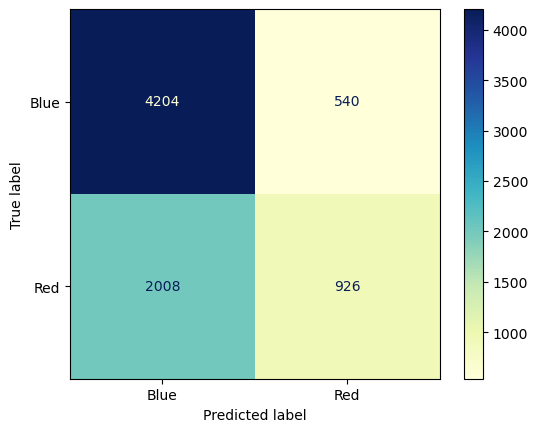

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap ='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Blue','Red']))

              precision    recall  f1-score   support

        Blue       0.68      0.89      0.77      4744
         Red       0.63      0.32      0.42      2934

    accuracy                           0.67      7678
   macro avg       0.65      0.60      0.59      7678
weighted avg       0.66      0.67      0.64      7678



In [ ]:
!pip install eli5

In [ ]:
import eli5
eli5.show_weights(model, top=20)

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Feature information

In [ ]:
#Extract all the words from the vectorizer
feature_names = model.named_steps["transformer"].get_feature_names()
feature_names[:5]

['aabenraa', 'aaja', 'aakjær', 'aalborg', 'aarhus']

In [ ]:
# Extract all the coefficients from the LR
coefs = model.named_steps["classifier"].coef_.flatten()

In [ ]:
#Create a DataFrame with the results of the classification, with the coefficients
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "red" if x > 0 else "blue") #esto esta al reves red y blue
df = df.sort_values("abs_value", ascending=False)
df.head()

,feature,value,abs_value,colors
16971,venstre,-4.694611,4.694611,blue
13188,sf,4.316876,4.316876,red
5616,grøn,3.150126,3.150126,red
2345,dansk_folkeparti,-3.147976,3.147976,blue
16327,ukraine,2.964043,2.964043,red


Text(0.5, 0, 'Feature Name')

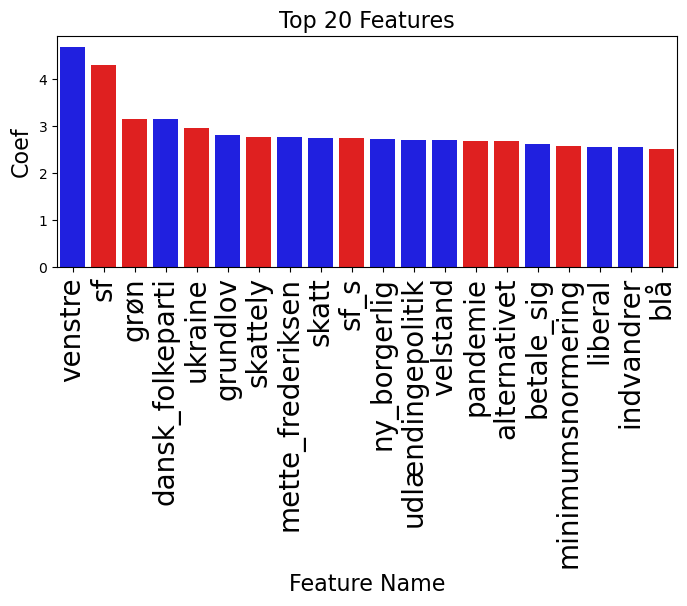

In [ ]:
#plot the Top 20 features for classification
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
sns.barplot(x="feature",
            y="abs_value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=16)
ax.set_ylabel("Coef", fontsize=16)
ax.set_xlabel("Feature Name", fontsize=16)

In [ ]:
#irrelevant features
less_relevant = df[df['abs_value'] < 0.010]
less_relevant.shape

(131, 4)

In [ ]:
#plot the words that actually do not help in classifiing a text
less_relevant = less_relevant.sort_values("abs_value", ascending=True)
less_relevant[:15]

,feature,value,abs_value,colors
2264,dagligvare,-0.000086,0.000086,blue
14941,sær,-0.000118,0.000118,blue
10494,notere,0.000235,0.000235,red
8768,life,0.000367,0.000367,red
4027,folketingsår,-0.000401,0.000401,blue
10430,nielsen,0.000579,0.000579,red
5218,gennemsigtig,-0.000601,0.000601,blue
11886,profit,0.000646,0.000646,red
10454,nordea,-0.000711,0.000711,blue
11653,pode,-0.000818,0.000818,blue


## Model Hypertuning

In [ ]:
#Tokenizing with more restrictions for tunning
def text_prepro_hyper(texts):
  tokens = []
  clean_container = []

  for text in nlp.pipe(texts, disable=["tagger", "parser", "ner"]):

    txt = [token.lemma_.lower() for token in text 
          if token.is_alpha
          and not token.is_punct
          and token.pos_ not in ['SYM', 'NUM', 'PRON', 'DET', 'AUX', 'CCONJ', 'INTJ', 'PART', 'X', 'PUNCT', 'SCONJ', 'ADV']]

    clean_container.append(" ".join(txt))
    tokens.append(txt)
      
  return clean_container, tokens

In [ ]:
#Get tokens and text with the tokens put together
sentences_hyper=[]
tokens_hyper=[]
sentences_hyper = text_prepro_hyper(data['sentences'])[0]
tokens_hyper = text_prepro_hyper(data['sentences'])[1]

In [ ]:
data['sentences_tunned'] = sentences_hyper

In [ ]:
data.head()

,index,taler,politc_party,speech,colour,variable,sentences,tokens,text_clean,sentences_tunned
0,0,Mette Frederiksen,Social Democrats,Tak til Alberte for den smukke sang. Du og din...,Red,0,Tak til Alberte for den smukke sang,"[tak, til, alberte, for, den, smuk, sang]",tak til alberte for den smuk sang,tak til alberte for smuk sang
1,1,Mette Frederiksen,Social Democrats,Deres Majestæt.\n\nDeres Kongelige Højheder.\n...,Red,0,Deres Majestæt,"[deres, majestæt]",deres_majestæt,majestæt
2,2,Mette Frederiksen,Social Democrats,"Hjertelig velkommen. Og tak, fordi I har rydde...",Red,0,Hjertelig velkommen,"[hjertelig, velkommen]",hjertelig velkommen,hjertelig velkommen
3,3,Mette Frederiksen,Social Democrats,Danmark er et fantastisk land. Men tiderne er ...,Red,0,Danmark er et fantastisk land,"[danmark, være, fantastisk, land]",danmark være fantastisk_land,danmark fantastisk land
4,4,Mette Frederiksen,Social Democrats,Kære danskere. Kære ukrainere.\n\nI aften for ...,Red,0,Kære danskere,"[kær, dansker]",kær dansker,kær dansker


In [ ]:
print('number of NaN cells: ', data['sentences_tunned'].isna().sum())
print('number of empty cells: ', len(data[data['sentences_tunned']=='']))

number of NaN cells:  0
number of empty cells:  707


In [ ]:
data_backup_hyper = data.copy()

In [ ]:
# data = data_backup_hyper

In [ ]:
data.shape

(38390, 10)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdela\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#This function gets the N-grams and makes the pipeline

def ngrams(tokens_hyper, data, min_count, threshold, min_df, max_df):
  phrase_model = Phrases(tokens_hyper, min_count=min_count, threshold=threshold)
  sentences_phrased = [phrase_model[line] for line in tokens_hyper]

  score_max = []

  for phrase, score in phrase_model.find_phrases(tokens_hyper).items():
      score_max.append((phrase, score))
      string_sentences = []
  
  cont = 0
  for i in tokens_hyper:
      var = ' '.join(sentences_phrased[cont])
      string_sentences.append(var)
      cont=cont+1
  
  data_test=data
  data_test['clean_text_tunned'] = string_sentences
  data_test = data_test [data_test['sentences_tunned']!=''].reset_index()

  X, y = data_test ['clean_text_tunned'], data_test ['colour']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

  tfidf = TfidfVectorizer(stop_words=dk_stop+stopwords.words('english'), min_df = min_df, max_df = max_df)
  X = tfidf.fit_transform(data_test ['clean_text_tunned'])
  shape = X.shape

  model = Pipeline(
    [
        ("transformer", tfidf),
        ("classifier", cls),
    ]
  )

  score=model_score(model, X_train, X_test, y_train, y_test)

  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=['Blue','Red']))
  
  return score, score_max, data_test, shape

  # return string_sentences


In [ ]:
data.shape

(38390, 10)

In [ ]:
len(tokens_hyper)

38390

Analysis of ngrams values

In [ ]:
#Adding values for testing the score with the n-grams
min_count = [2, 5, 25, 50, 100]
threshold = [2, 5, 25, 50, 100]

In [ ]:
#testing results with different configuration of the gensim Phrases
for i in min_count:
  for j in threshold:
    print(f'score with ', i,' min_count and',j,'threshold:', ngrams(tokens_hyper, data, i, j, 1, 1.0)[0])


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.90      0.78      6987
         Red       0.67      0.34      0.45      4318

    accuracy                           0.68     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.68      0.65     11305

score with  2  min_count and 2 threshold: 0.6842105263157895


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.35      0.46      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  2  min_count and 5 threshold: 0.686687306501548


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.66      0.35      0.46      4318

    accuracy                           0.68     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305

score with  2  min_count and 25 threshold: 0.6841220698805838


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.66      0.37      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305

score with  2  min_count and 50 threshold: 0.6844758956214064


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.35      0.46      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  2  min_count and 100 threshold: 0.6853604599734631


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.70      0.89      0.78      6987
         Red       0.68      0.38      0.49      4318

    accuracy                           0.69     11305
   macro avg       0.69      0.63      0.63     11305
weighted avg       0.69      0.69      0.67     11305

score with  5  min_count and 2 threshold: 0.6936753648827952


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.66      0.37      0.48      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  5  min_count and 5 threshold: 0.6874834144183989


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.66      0.37      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  5  min_count and 25 threshold: 0.6851835471030517


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.66      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  5  min_count and 50 threshold: 0.686421937195931


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.66      0.35      0.46      4318

    accuracy                           0.68     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.68      0.65     11305

score with  5  min_count and 100 threshold: 0.6832375055285272


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.70      0.87      0.78      6987
         Red       0.66      0.39      0.49      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.67     11305

score with  25  min_count and 2 threshold: 0.6895179124281291


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.77      6987
         Red       0.65      0.37      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305

score with  25  min_count and 5 threshold: 0.6834144183989386


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.66      0.36      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305

score with  25  min_count and 25 threshold: 0.6844758956214064


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.70      0.88      0.78      6987
         Red       0.66      0.38      0.48      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  25  min_count and 50 threshold: 0.6891640866873066


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.87      0.77      6987
         Red       0.64      0.36      0.46      4318

    accuracy                           0.68     11305
   macro avg       0.66      0.62      0.62     11305
weighted avg       0.67      0.68      0.65     11305

score with  25  min_count and 100 threshold: 0.6776647501105706


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.77      6987
         Red       0.65      0.38      0.48      4318

    accuracy                           0.69     11305
   macro avg       0.67      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  50  min_count and 2 threshold: 0.6850066342326404


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.87      0.77      6987
         Red       0.65      0.37      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.67      0.68      0.66     11305

score with  50  min_count and 5 threshold: 0.6821760283060593


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.37      0.48      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  50  min_count and 25 threshold: 0.6888102609464839


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.66      0.36      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305

score with  50  min_count and 50 threshold: 0.6843874391862008


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.70      0.88      0.78      6987
         Red       0.66      0.37      0.48      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  50  min_count and 100 threshold: 0.6881910659000442


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.65      0.37      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.67      0.63      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  100  min_count and 2 threshold: 0.6850950906678461


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.87      0.77      6987
         Red       0.64      0.37      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.67      0.68      0.66     11305

score with  100  min_count and 5 threshold: 0.6807607253427687


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.87      0.77      6987
         Red       0.65      0.37      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305

score with  100  min_count and 25 threshold: 0.6831490490933215


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.70      0.88      0.78      6987
         Red       0.66      0.38      0.48      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  100  min_count and 50 threshold: 0.6873949579831933


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  100  min_count and 100 threshold: 0.6875718708536046


In [ ]:
#Default values
score_ngrams, score_max_ngrams, data_ngrams, shape_ngrams = ngrams(tokens_hyper, data, 5, 10, 1, 1.0)

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.77      6987
         Red       0.65      0.37      0.47      4318

    accuracy                           0.68     11305
   macro avg       0.67      0.62      0.62     11305
weighted avg       0.68      0.68      0.66     11305



Analysis the tdfidf

In [ ]:
#Test different configuration for the TF - IDF
max_df = [1.0, 0.1, 0.01, 0.0001]
min_df = [1, 0.001, 0.00003, 0.00001]

for i in min_df:
  for j in max_df:
    try:
      score_ngrams, score_max_ngrams, data_2, shape_ngrams = ngrams(tokens_hyper, data, 5, 10, i, j)
      print(f'score with  min_count', i,', and max_df',j,'is:', score_ngrams,'; with a shape of:',shape_ngrams)
    except ValueError:
      pass

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  min_count 1 , and max_df 1.0 is: 0.6881026094648386 ; with a shape of: (37683, 18561)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  min_count 1 , and max_df 0.1 is: 0.6888987173816895 ; with a shape of: (37683, 18561)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.90      0.78      6987
         Red       0.68      0.34      0.46      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  min_count 1 , and max_df 0.01 is: 0.686687306501548 ; with a shape of: (37683, 18522)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.63      0.97      0.77      6987
         Red       0.65      0.08      0.14      4318

    accuracy                           0.63     11305
   macro avg       0.64      0.53      0.45     11305
weighted avg       0.64      0.63      0.53     11305

score with  min_count 1 , and max_df 0.0001 is: 0.6317558602388323 ; with a shape of: (37683, 13308)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.66      0.88      0.75      6987
         Red       0.57      0.25      0.35      4318

    accuracy                           0.64     11305
   macro avg       0.61      0.57      0.55     11305
weighted avg       0.62      0.64      0.60     11305

score with  min_count 0.001 , and max_df 1.0 is: 0.6414860681114551 ; with a shape of: (37683, 704)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.66      0.89      0.76      6987
         Red       0.59      0.25      0.35      4318

    accuracy                           0.65     11305
   macro avg       0.62      0.57      0.56     11305
weighted avg       0.63      0.65      0.60     11305

score with  min_count 0.001 , and max_df 0.1 is: 0.6470588235294118 ; with a shape of: (37683, 704)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.65      0.91      0.76      6987
         Red       0.59      0.22      0.32      4318

    accuracy                           0.64     11305
   macro avg       0.62      0.56      0.54     11305
weighted avg       0.63      0.64      0.59     11305

score with  min_count 0.001 , and max_df 0.01 is: 0.6442282176028306 ; with a shape of: (37683, 665)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(
c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.66      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  min_count 3e-05 , and max_df 1.0 is: 0.686156567890314 ; with a shape of: (37683, 9215)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.67      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.62     11305
weighted avg       0.68      0.69      0.66     11305

score with  min_count 3e-05 , and max_df 0.1 is: 0.6874834144183989 ; with a shape of: (37683, 9215)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.66      0.35      0.45      4318

    accuracy                           0.68     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.68      0.65     11305

score with  min_count 3e-05 , and max_df 0.01 is: 0.6829721362229102 ; with a shape of: (37683, 9176)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.63      0.97      0.77      6987
         Red       0.65      0.08      0.14      4318

    accuracy                           0.63     11305
   macro avg       0.64      0.53      0.45     11305
weighted avg       0.64      0.63      0.52     11305

score with  min_count 3e-05 , and max_df 0.0001 is: 0.6314020344980097 ; with a shape of: (37683, 3962)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.89      0.78      6987
         Red       0.68      0.36      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.69      0.63      0.63     11305
weighted avg       0.69      0.69      0.66     11305

score with  min_count 1e-05 , and max_df 1.0 is: 0.6902255639097744 ; with a shape of: (37683, 18561)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.88      0.78      6987
         Red       0.66      0.37      0.47      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.63      0.63     11305
weighted avg       0.68      0.69      0.66     11305

score with  min_count 1e-05 , and max_df 0.1 is: 0.6863334807607253 ; with a shape of: (37683, 18561)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.69      0.90      0.78      6987
         Red       0.67      0.34      0.45      4318

    accuracy                           0.69     11305
   macro avg       0.68      0.62      0.62     11305
weighted avg       0.68      0.69      0.65     11305

score with  min_count 1e-05 , and max_df 0.01 is: 0.6851835471030517 ; with a shape of: (37683, 18522)


c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

        Blue       0.63      0.98      0.77      6987
         Red       0.66      0.07      0.13      4318

    accuracy                           0.63     11305
   macro avg       0.65      0.52      0.45     11305
weighted avg       0.64      0.63      0.52     11305

score with  min_count 1e-05 , and max_df 0.0001 is: 0.6312251216275984 ; with a shape of: (37683, 13308)


In [ ]:
tfidf = TfidfVectorizer(stop_words=dk_stop+stopwords.words('english'), max_df = 90)

In [ ]:
X = tfidf.fit_transform(data['clean_text_tunned'])
X.shape

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bl', 'ca', 'eks', 'pga'] not in stop_words.
  warnings.warn(


(38390, 18276)

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(X.toarray())

38390

In [ ]:
len(tfidf.get_feature_names())

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


18561

In [ ]:
data_2.shape

(37683, 12)

In [ ]:
model = Pipeline(
[
    ("transformer", tfidf),
    ("classifier", cls),
]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 TfidfVectorizer(stop_words=['ad', 'af', 'aldrig', 'alene',
                                             'alle', 'allerede', 'alligevel',
                                             'alt', 'altid', 'anden', 'andet',
                                             'andre', 'at', 'bag', 'bare',
                                             'begge', 'bl.a.', 'blandt', 'blev',
                                             'blive', 'bliver', 'burde', 'bør',
                                             'ca.', 'da', 'de', 'dem', 'den',
                                             'denne', 'dens', ...])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
model.score(X_test, y_test)

0.6681427455066423

In [ ]:
X.shape

(38390, 18561)

In [ ]:
len(tfidf.get_feature_names())

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


17730

In [ ]:
df_tf = pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names())

c:\Users\mdela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_tf.sum().sort_values(ascending=False)

gøre_forskel     61.178469
stoppe           54.931272
udfordre         51.980754
forandre         51.838044
ansvarlig        50.824247
                   ...    
engelsksproge     0.175138
amanda            0.172358
særbehandling     0.172358
vogn              0.172358
gorman            0.172358
Length: 18276, dtype: float64